<a href="https://colab.research.google.com/github/SandipPalit/ML-CODES/blob/main/Regression/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries



In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from tabulate import tabulate

import warnings

In [24]:
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

### Input Dataset

In [25]:
df = pd.read_csv('/content/weatherHistory.csv',low_memory=False)

In [26]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Preprocessing

In [27]:
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [28]:
# removing Formatted Date, Daily Summary & Loud Cover columns.
df=df.drop(['Formatted Date','Daily Summary','Loud Cover'],axis=1)

In [29]:
# removing Null
df=df.dropna()

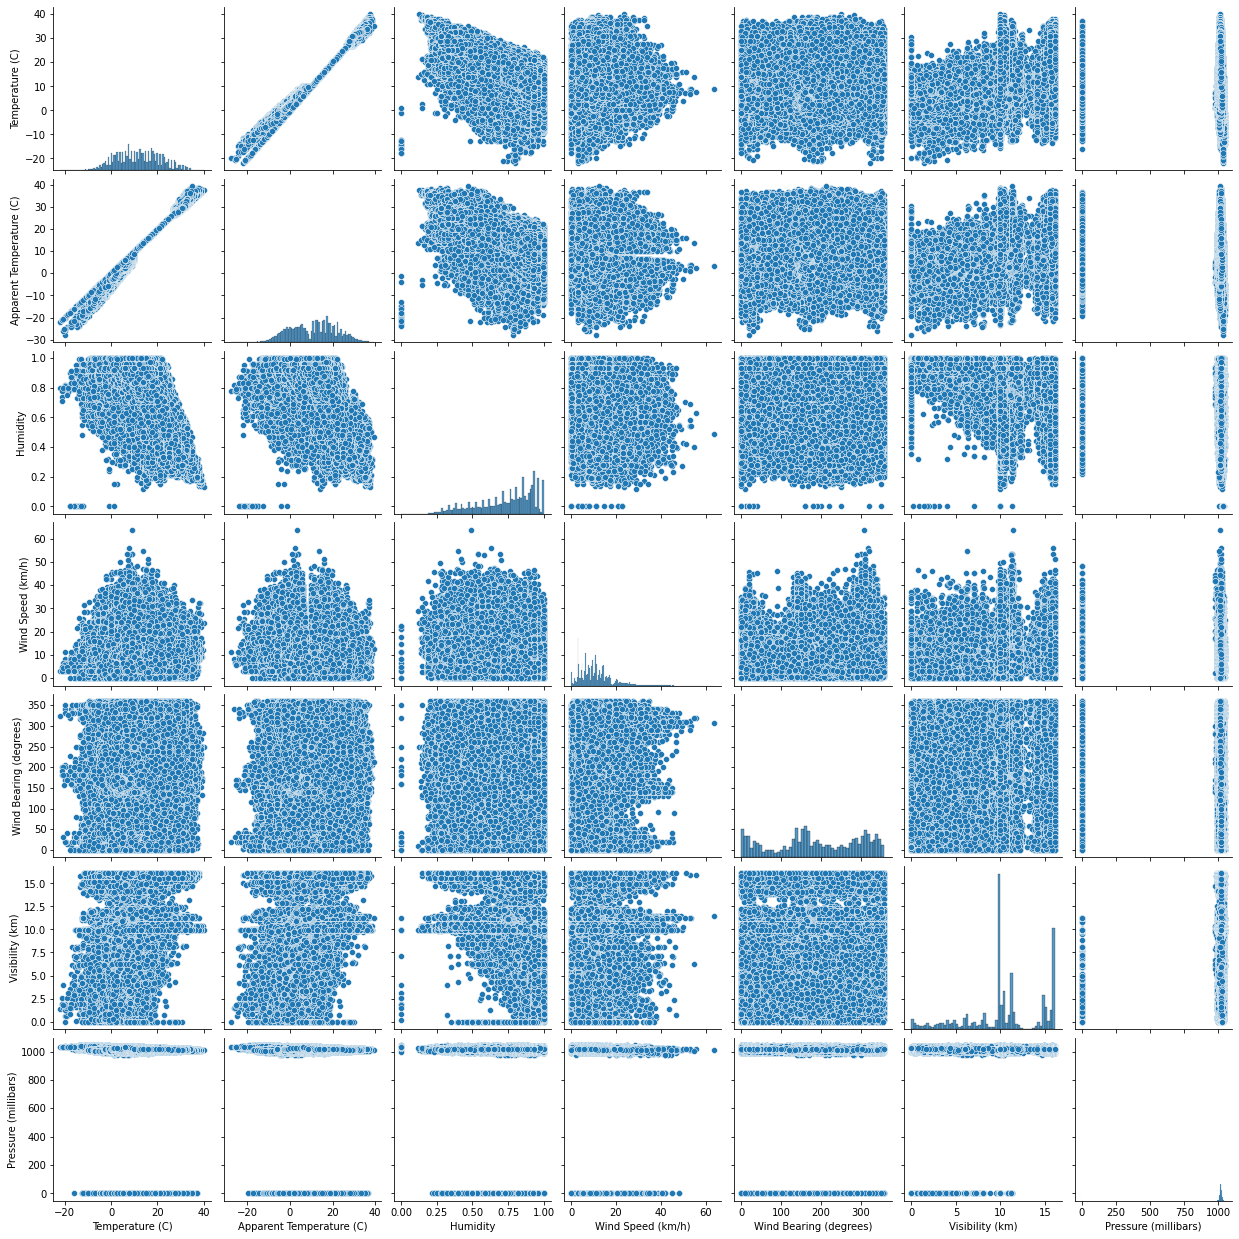

In [30]:
sns.pairplot(df)

In [31]:
# One Hot Encoding
encoderS=OneHotEncoder(sparse=False)
dfS=pd.DataFrame(encoderS.fit_transform(df[['Summary']]))
dfS.columns = encoderS.get_feature_names_out(['Summary'])
dfS=dfS.drop(['Summary_Windy and Partly Cloudy'],axis=1)

encoderP=OneHotEncoder(sparse=False)
dfP=pd.DataFrame(encoderP.fit_transform(df[['Precip Type']]))
dfP.columns = encoderP.get_feature_names_out(['Precip Type'])
dfP=dfP.drop(['Precip Type_snow'],axis=1)

df=df.drop(['Summary','Precip Type'],axis=1)

df= pd.concat([dfS, dfP, df ], axis=1)

In [32]:
#Standardisation
standardScalerT=StandardScaler()
df['Temperature (C)']=standardScalerT.fit_transform(df[['Temperature (C)']])

standardScalerA=StandardScaler()
df['Apparent Temperature (C)']=standardScalerA.fit_transform(df[['Apparent Temperature (C)']])

standardScalerH=StandardScaler()
df['Humidity']=standardScalerH.fit_transform(df[['Humidity']])

standardScalerWS=StandardScaler()
df['Wind Speed (km/h)']=standardScalerWS.fit_transform(df[['Wind Speed (km/h)']])

standardScalerWB=StandardScaler()
df['Wind Bearing (degrees)']=standardScalerWB.fit_transform(df[['Wind Bearing (degrees)']])

standardScalerV=StandardScaler()
df['Visibility (km)']=standardScalerV.fit_transform(df[['Visibility (km)']])

standardScalerP=StandardScaler()
df['Pressure (millibars)']=standardScalerP.fit_transform(df[['Pressure (millibars)']])

In [33]:
# removing Null
df=df.dropna()

In [34]:
df.head()

,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Precip Type_rain,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.257951,-0.324102,0.792748,0.478964,0.591157,1.309107,0.102152
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.270141,-0.339134,0.639470,0.499902,0.665655,1.309107,0.106415
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.267819,-0.138532,0.792748,-0.993620,0.153478,1.100806,0.109058
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.381594,-0.458873,0.486192,0.476638,0.758778,1.309107,0.113066
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.332833,-0.362460,0.486192,0.034630,0.665655,1.309107,0.113919


### Model Training

In [35]:
Y=df[['Visibility (km)']]
X=df.drop(['Visibility (km)'],axis=1)

In [36]:
X.head()

,Summary_Breezy,Summary_Breezy and Dry,Summary_Breezy and Foggy,Summary_Breezy and Mostly Cloudy,Summary_Breezy and Overcast,Summary_Breezy and Partly Cloudy,Summary_Clear,Summary_Dangerously Windy and Partly Cloudy,Summary_Drizzle,Summary_Dry,Summary_Dry and Mostly Cloudy,Summary_Dry and Partly Cloudy,Summary_Foggy,Summary_Humid and Mostly Cloudy,Summary_Humid and Overcast,Summary_Humid and Partly Cloudy,Summary_Light Rain,Summary_Mostly Cloudy,Summary_Overcast,Summary_Partly Cloudy,Summary_Rain,Summary_Windy,Summary_Windy and Dry,Summary_Windy and Foggy,Summary_Windy and Mostly Cloudy,Summary_Windy and Overcast,Precip Type_rain,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Pressure (millibars)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.257951,-0.324102,0.792748,0.478964,0.591157,0.102152
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.270141,-0.339134,0.639470,0.499902,0.665655,0.106415
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.267819,-0.138532,0.792748,-0.993620,0.153478,0.109058
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.381594,-0.458873,0.486192,0.476638,0.758778,0.113066
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.332833,-0.362460,0.486192,0.034630,0.665655,0.113919


In [37]:
Y.head()

,Visibility (km)
0,1.309107
1,1.309107
2,1.100806
3,1.309107
4,1.309107


In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### Linear Regression

In [39]:
regLR=LinearRegression()
regLR.fit(X_train,Y_train)
yPredRegLR=regLR.predict(X_test)
mean_squared_error(yPredRegLR, Y_test)

0.7222545727515114

### Support Vector Regression

In [40]:
regSVR=SVR(kernel='linear')
regSVR.fit(X_train,Y_train)
yPredRegSVR=regSVR.predict(X_test)
mean_squared_error(yPredRegSVR, Y_test)

0.7910517475360421

### Decision Tree Regression

In [41]:
regDTR=DecisionTreeRegressor()
regDTR.fit(X_train,Y_train)
yPredRegDTR=regDTR.predict(X_test)
mean_squared_error(yPredRegDTR, Y_test)

0.8188967919465143

### Random Forest Regression

In [42]:
regRFR=RandomForestRegressor()
regRFR.fit(X_train,Y_train)
yPredRegRFR=regRFR.predict(X_test)
mean_squared_error(yPredRegRFR, Y_test)

0.4115144961270175

### Model Evaluation

In [44]:
data=[
     ["Linear Regression",round(mean_absolute_error(yPredRegLR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegLR, Y_test)),2),round(r2_score(yPredRegLR, Y_test),2)],
     ["Support Vector Regression",round(mean_absolute_error(yPredRegSVR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegSVR, Y_test)),2),round(r2_score(yPredRegSVR, Y_test),2)],
     ["Decision Tree Regression",round(mean_absolute_error(yPredRegDTR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegDTR, Y_test)),2),round(r2_score(yPredRegDTR, Y_test),2)],
     ["Random Forest Regression",round(mean_absolute_error(yPredRegRFR, Y_test),2),round(np.sqrt(mean_squared_error(yPredRegRFR, Y_test)),2),round(r2_score(yPredRegRFR, Y_test),2)] 
    ]
columns=["Model Name","Mean Absolute Error","Root Mean Squared Error","R Squared Error"]

print(tabulate(data, headers=columns, tablefmt="fancy_grid"))

╒═══════════════════════════╤═══════════════════════╤═══════════════════════════╤═══════════════════╕
│ Model Name                │   Mean Absolute Error │   Root Mean Squared Error │   R Squared Error │
╞═══════════════════════════╪═══════════════════════╪═══════════════════════════╪═══════════════════╡
│ Linear Regression         │                  0.7  │                      0.85 │             -1.55 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Support Vector Regression │                  0.67 │                      0.89 │             -2.02 │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Decision Tree Regression  │                  0.62 │                      0.9  │              0.2  │
├───────────────────────────┼───────────────────────┼───────────────────────────┼───────────────────┤
│ Random Forest Regression  │                  0.49 │                      0.64 │ 

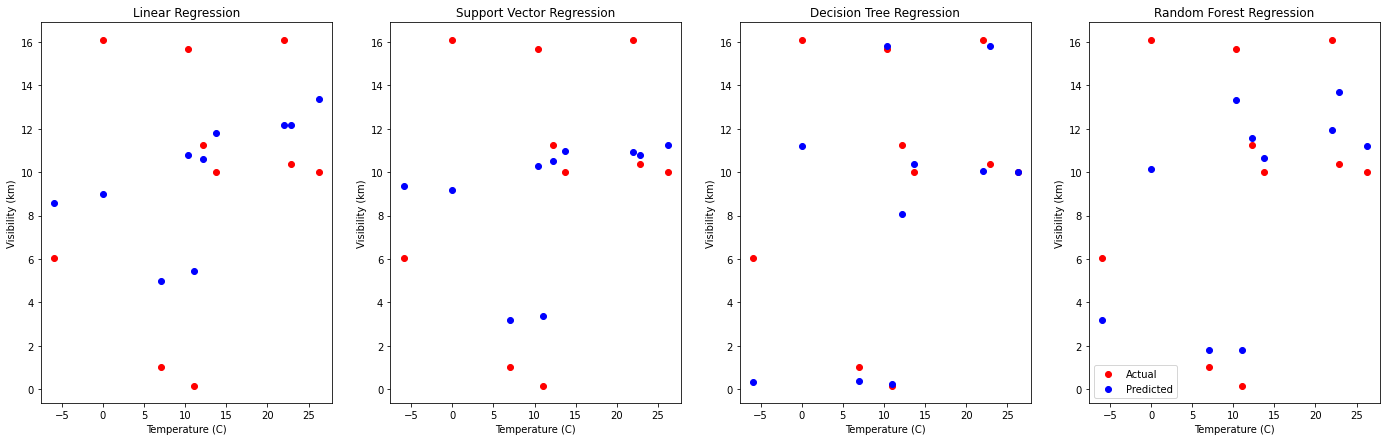

In [43]:
figure, axes = plt.subplots(1, 4, figsize=(24, 7))

axes[0].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(Y_test)[:10], color = 'red')
axes[0].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(pd.DataFrame(yPredRegLR))[:10], color = 'blue')
axes[0].set_title('Linear Regression')
axes[0].set_xlabel('Temperature (C)')
axes[0].set_ylabel('Visibility (km)')

axes[1].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(Y_test)[:10], color = 'red')
axes[1].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(pd.DataFrame(yPredRegSVR))[:10], color = 'blue')
axes[1].set_title('Support Vector Regression')
axes[1].set_xlabel('Temperature (C)')
axes[1].set_ylabel('Visibility (km)')

axes[2].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(Y_test)[:10], color = 'red')
axes[2].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(pd.DataFrame(yPredRegDTR))[:10], color = 'blue')
axes[2].set_title('Decision Tree Regression')
axes[2].set_xlabel('Temperature (C)')
axes[2].set_ylabel('Visibility (km)')

axes[3].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(Y_test)[:10], color = 'red', label="Actual")
axes[3].scatter(standardScalerT.inverse_transform(X_test[['Temperature (C)']])[:10], standardScalerV.inverse_transform(pd.DataFrame(yPredRegRFR))[:10], color = 'blue', label="Predicted")
axes[3].set_title('Random Forest Regression')
axes[3].set_xlabel('Temperature (C)')
axes[3].set_ylabel('Visibility (km)')

axes[3].legend()